In [1]:
!pip install chart_studio
!pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os
print(os.listdir("../input"))
%matplotlib inline


     |████████████████████████████████| 64 kB 1.3 MB/s 
['wind-turbine-scada-dataset']


/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

In [2]:
data_T_start=pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")
data_T_start.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
turbine_no="T1" #for powercurve graph

In [4]:
data_T_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
data1_T=data_T_start.copy()

In [6]:
data1_T.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
data1_T.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
data1_T.rename(columns={'Date/Time':'Time'},inplace=True)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [8]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"    

In [9]:
#add months
data1_T['Month']=data1_T.Time.apply(find_month)

In [10]:
data1_T.Month.unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August',
       'Sep', 'Oct', 'Nov', 'Dec'], dtype=object)

In [11]:
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [12]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if x < i:
            x=i-0.25
            return x

In [13]:
#adding a new column as "mean_WindSpeed" with function mean_speed().
data1_T["mean_WindSpeed"]=data1_T["WindSpeed(m/s)"].apply(mean_speed)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [14]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [15]:
#adding a new column as "mean_Direction" with function mean_direction().
data1_T["mean_Direction"]=data1_T["Wind_Direction"].apply(mean_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [16]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
  

In [17]:
#adding a new column as "Direction" with function find_direction().
data1_T["Direction"]=data1_T["mean_Direction"].apply(find_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [18]:
df=data1_T[["ActivePower(kW)","WindSpeed(m/s)","Theoretical_Power_Curve (KWh)"]]
df.head()

,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972


In [19]:
cols=list(df.columns)
to_ren=["A","v","P"]
def merge_list_to_dict(test_keys,test_values):
  # using dictionary comprehension
  # to convert lists to dictionary
  merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
  return merged_dict
df.rename(columns=merge_list_to_dict(cols,to_ren),inplace=True)
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A,v,P
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972


In [20]:
df["v2"]=df["v"]**2
df["v3"]=df["v"]**3
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,A,v,P,v2,v3
0,380.047791,5.311336,416.328908,28.210291,149.834333
1,453.769196,5.672167,519.917511,32.173476,182.493326
2,306.376587,5.216037,390.900016,27.207040,141.912921
3,419.645905,5.659674,516.127569,32.031912,181.290183
4,380.650696,5.577941,491.702972,31.113425,173.548848


In [21]:
df["Ratio"]=df["P"]/df["v3"]
df["Ratio"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        2.778595
1        2.848967
2        2.754506
3        2.846969
4        2.833225
           ...   
50525    2.290577
50526    2.975337
50527    2.979381
50528    2.891901
50529    2.796488
Name: Ratio, Length: 50530, dtype: float64

In [22]:
df["Ratio"].mean()

1.9881820313590919

In [23]:

# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 
def filt(x):
    ans=[]
    for i in x:
        if i!=0:
            ans.append(i)
    return ans
        
# Driver Code 
lst = list(df["Ratio"].values) 
#print(lst)
ans=filt(lst)
#print(ans)
average = Average(ans) 
average

nan

In [24]:
df["Ratio"].median()

2.5213190642559837

In [25]:
x = df[df["Ratio"]!=0]
x.mean()

A        1544.099735
v           8.566722
P        1762.044031
v2         87.761310
v3       1041.614290
Ratio       2.347840
dtype: float64

In [26]:
df.head()

,A,v,P,v2,v3,Ratio
0,380.047791,5.311336,416.328908,28.210291,149.834333,2.778595
1,453.769196,5.672167,519.917511,32.173476,182.493326,2.848967
2,306.376587,5.216037,390.900016,27.207040,141.912921,2.754506
3,419.645905,5.659674,516.127569,32.031912,181.290183,2.846969
4,380.650696,5.577941,491.702972,31.113425,173.548848,2.833225


In [27]:
X=df[["v","v2","v3"]].values
y=df[["A"]].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)

In [29]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  [147.58315806]
CO-EFFICIENT :  [[-243.56198945   68.17020323   -2.38937541]]


In [30]:
y_pred = linreg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8952002242472404


mean_absolute_error : 218.0855749132601


mean_squared_error :  182270.21700931745


root_mean_squared_error :  426.93116190940833


In [31]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8952002242472401


mean_absolute_error : 218.08557491327383


mean_squared_error :  182270.21700931797


root_mean_squared_error :  426.93116190940896


In [32]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8298551709206896


mean_absolute_error : 395.5549623230265


mean_squared_error :  295919.85952777683


root_mean_squared_error :  543.9851648048657


In [33]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range


array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [34]:

# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [35]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8619058717016115


mean_absolute_error : 343.019613552272


mean_squared_error :  240176.53236244663


root_mean_squared_error :  490.0780880252112


In [36]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-220.74210999   65.49332647   -2.30268483]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876593139.6571803, tolerance: 6067378.891136087
  positive)


In [37]:
# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-106.40661654   51.99135297   -1.86288346]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22851546.858707428, tolerance: 6067378.891136087
  positive)


In [38]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8917999797630842


mean_absolute_error : 248.4937463441025


mean_squared_error :  188184.00161009762


root_mean_squared_error :  433.8017999156961


In [39]:
#select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha :  0.006354985818849988


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58198720.40614033, tolerance: 6067378.891136087
  positive)


In [40]:
# examine the coefficients
print(lassoregcv.coef_)

[-152.58065005   57.44431714   -2.04051008]


In [41]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.8935926923171706


mean_absolute_error : 237.28094882138532


mean_squared_error :  185066.07407712718


root_mean_squared_error :  430.19306604956705


In [42]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(regr.coef_)

[[-246.85693446   68.59202729   -2.40432108]]


In [44]:
dir(regr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [45]:
regr.intercept_

array([154.24732445])

In [46]:
#Number of wind speed values between 3.5 and 25. 
len(data1_T["WindSpeed(m/s)"][(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25)])

40634

In [47]:
#Values bigger than 25. 
data1_T["WindSpeed(m/s)"][data1_T["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [48]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data2_T=data1_T[(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25.5)]

In [49]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data2_T["ActivePower(kW)"][(data2_T["ActivePower(kW)"]==0)&(data2_T["WindSpeed(m/s)"]>3.5)])

2217

In [50]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.
data3_T=data2_T[((data2_T["ActivePower(kW)"]!=0)&(data2_T["WindSpeed(m/s)"]>3.5)) | (data2_T["WindSpeed(m/s)"]<=3.5)]

In [51]:
#Number of values
len(data3_T["WindSpeed(m/s)"])

38418

In [52]:
data3_T.head(10)

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,5.5,270,W
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,6.0,270,W
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,5.5,270,W
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,5.5,240,SWW
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,5.5,270,W


In [53]:
#the mean value of Nordex_Powercurve(kW) when mean_WindSpeed is 5.5
data3_T["Theoretical_Power_Curve (KWh)"][data3_T["mean_WindSpeed"]==5.5].mean()

472.0957519264287

In [54]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and ActivePower. 
data_T_clean=data3_T.sort_values("Time")
data_T_clean["Loss_Value(kW)"]=data_T_clean["Theoretical_Power_Curve (KWh)"]-data_T_clean["ActivePower(kW)"]
data_T_clean["Loss(%)"]=data_T_clean["Loss_Value(kW)"]/data_T_clean["Theoretical_Power_Curve (KWh)"]*100
#round the values to 2 digit.
data_T_clean=data_T_clean.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

data_T_clean.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99,Jan,5.5,270,W,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.64,Jan,5.5,270,W,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.56,Jan,5.0,270,W,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.26,Jan,5.5,270,W,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.67,Jan,5.5,270,W,111.05,22.59


In [55]:
#creating summary speed dataframe from clean data.
DepGroupT_speed = data_T_clean.groupby("mean_WindSpeed")
data_T_speed=DepGroupT_speed.mean()
#removing the unnecessary columns.
data_T_speed.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
#creating a windspeed column from index values.
listTspeed_WS=data_T_speed.index.copy()
data_T_speed["WindSpeed(m/s)"]=listTspeed_WS
#changing the place of columns.
data_T_speed=data_T_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
#changing the index numbers.
data_T_speed["Index"]=list(range(1,len(data_T_speed.index)+1))
data_T_speed.set_index("Index",inplace=True)
#rounding the values to 2 digit
data_T_speed=data_T_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean data.
data_T_speed["count"]=[len(data_T_clean["mean_WindSpeed"][data_T_clean["mean_WindSpeed"]==i]) 
                        for i in data_T_speed["WindSpeed(m/s)"]]


In [56]:
data_T_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254


In [57]:
#create summary direction dataframe from clean data.
DepGroupT_direction = data_T_clean.groupby("Direction")
data_T_direction=DepGroupT_direction.mean()
#remove the unnecessary columns.
data_T_direction.drop(columns={"WindSpeed(m/s)","Wind_Direction"},inplace=True)
#create a column from index.
listTdirection_Dir=data_T_direction.index.copy()
data_T_direction["Direction"]=listTdirection_Dir
#change the name of mean_WindSpeed column as  WindSpeed.
data_T_direction["WindSpeed(m/s)"]=data_T_direction["mean_WindSpeed"]
data_T_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#change the place of columns.
data_T_direction=data_T_direction[["Direction","mean_Direction","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
                                     "Loss_Value(kW)","Loss(%)"]]
#change the index numbers.
data_T_direction["Index"]=list(range(1,len(data_T_direction.index)+1))
data_T_direction.set_index("Index",inplace=True)
#create a count column that shows the number of directions from clean data.
data_T_direction["count"]=[len(data_T_clean["Direction"][data_T_clean["Direction"]==i]) 
                        for i in data_T_direction["Direction"]]
#round the values to 2 digit
data_T_direction=data_T_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'Loss_Value(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
data_T_direction=data_T_direction.sort_values("mean_Direction")
data_T_direction.drop(columns={"mean_Direction"},inplace=True)

In [58]:
data_T_direction

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),Loss_Value(kW),Loss(%),count
Index,,,,,,,
2,N,1171.54,1383.10,7.4,211.56,17.91,1294
4,NNE,1511.73,1739.18,8.4,227.45,13.76,7533
3,NEE,1773.33,1969.08,8.8,195.75,13.02,13042
1,E,1209.27,1345.86,7.4,136.59,3.68,2088
8,SEE,579.82,631.63,5.6,51.80,7.88,485
9,SSE,912.14,1047.23,6.7,135.09,16.16,511
7,S,2409.73,2517.83,11.7,108.10,6.82,3710
10,SSW,2300.71,2439.50,10.9,138.79,8.12,6119
11,SWW,1252.60,1359.33,7.4,106.73,11.59,1663


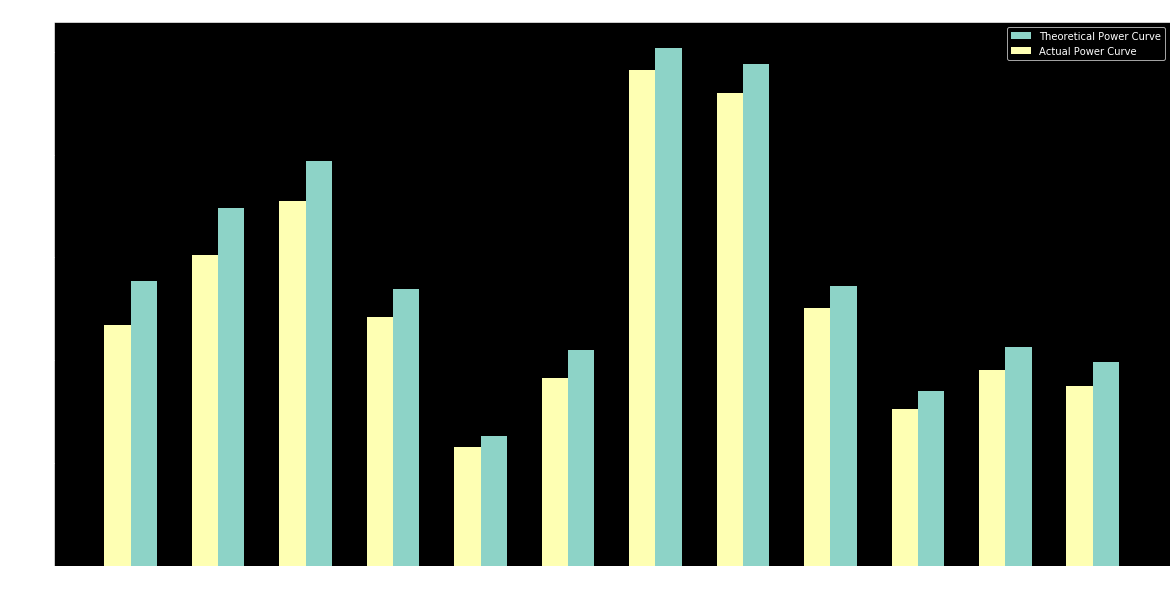

In [59]:
#Drawing graph of mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction["Direction"],data_T_direction["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction["Direction"],data_T_direction["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Mean Power Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [60]:
#creating summary direction total dataframe from direction data.
data_T_direction_total=data_T_direction.copy()
#removing the unnecessary columns.
data_T_direction_total.drop(columns={"count","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"},inplace=True)
#calculating the total values from direction data.
data_T_direction_total["Total_Generation(MWh)"]=data_T_direction["ActivePower(kW)"]*data_T_direction["count"]/6000
data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]=data_T_direction["Theoretical_Power_Curve (KWh)"]*data_T_direction["count"]/6000
data_T_direction_total["Total_Loss(MWh)"]=data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]-data_T_direction_total["Total_Generation(MWh)"]
data_T_direction_total["Loss(%)"]=data_T_direction_total["Total_Loss(MWh)"]/data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]*100
#rounding the values to 2 digit
data_T_direction_total=data_T_direction_total.round({'WindSpeed(m/s)': 1,'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                           'Total_Loss(MWh)': 2, 'Loss(%)': 2})
#changing the place of columns.
data_T_direction_total=data_T_direction_total[["Direction","Total_Generation(MWh)","Theoretical_PC_Total_Generation(MWh)","WindSpeed(m/s)",
                                     "Total_Loss(MWh)","Loss(%)"]]

In [61]:
data_T_direction_total

,Direction,Total_Generation(MWh),Theoretical_PC_Total_Generation(MWh),WindSpeed(m/s),Total_Loss(MWh),Loss(%)
Index,,,,,,
2,N,252.66,298.29,7.4,45.63,15.30
4,NNE,1897.98,2183.54,8.4,285.56,13.08
3,NEE,3854.63,4280.12,8.8,425.50,9.94
1,E,420.83,468.36,7.4,47.53,10.15
8,SEE,46.87,51.06,5.6,4.19,8.20
9,SSE,77.68,89.19,6.7,11.51,12.90
7,S,1490.02,1556.86,11.7,66.84,4.29
10,SSW,2346.34,2487.88,10.9,141.54,5.69
11,SWW,347.18,376.76,7.4,29.58,7.85


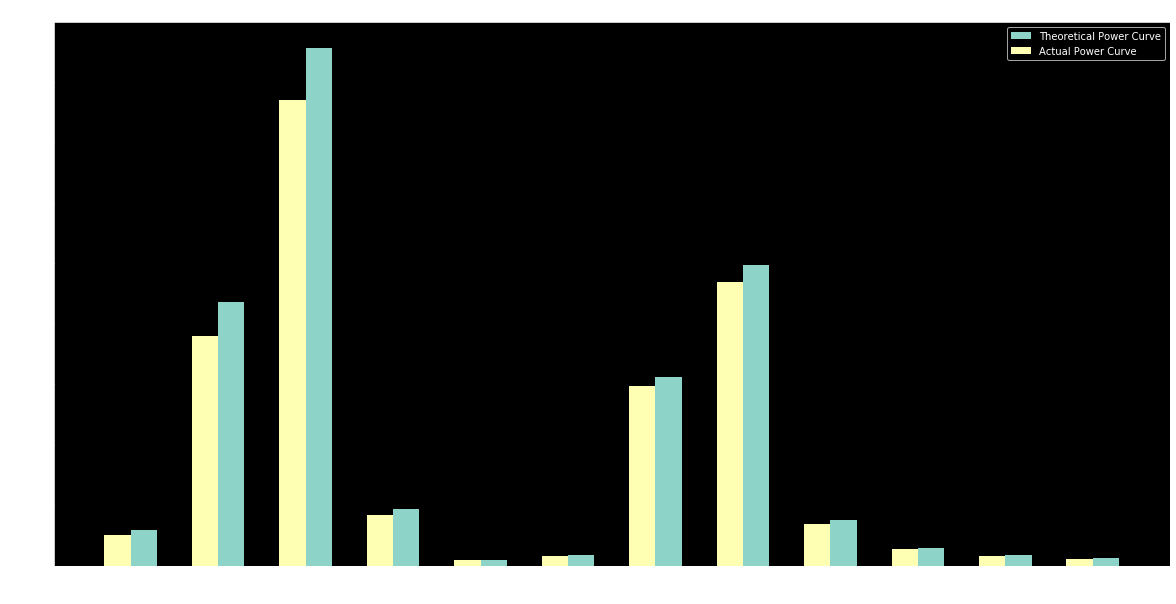

In [62]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

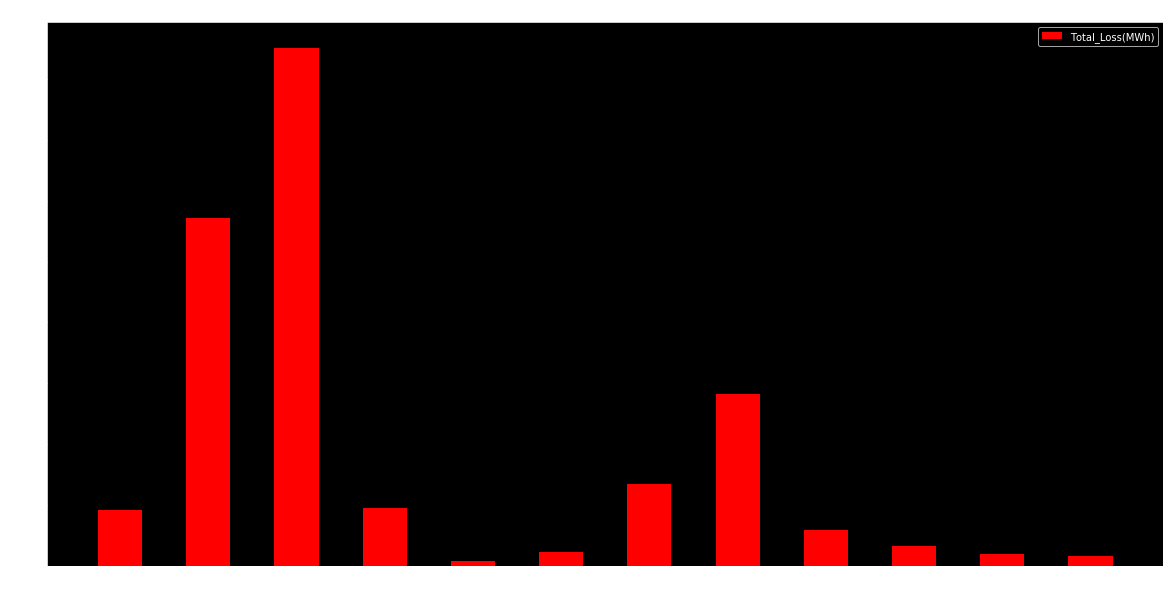

In [63]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Wind Farm {} Total Loss Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [64]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data_T_clean[data_T_clean["Direction"]==list_yon[i]]
    #
    DepGroup_A = data1T_A.groupby("mean_WindSpeed")
    data_T_A=DepGroup_A.mean()
    #
    data_T_A.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
    #
    listTA_WS=data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T_A=data_T_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
    #
    data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
    data_T_A.set_index("Index",inplace=True)
    #
    data_T_A=data_T_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
    #
    data_T_A["count"]=[len(data1T_A["mean_WindSpeed"][data1T_A["mean_WindSpeed"]==x]) 
                            for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)
    
data_T_N=list_data[0]
data_T_NNE=list_data[1]
data_T_NEE=list_data[2]
data_T_E=list_data[3]
data_T_SEE=list_data[4]
data_T_SSE=list_data[5]
data_T_S=list_data[6]
data_T_SSW=list_data[7]
data_T_SWW=list_data[8]
data_T_W=list_data[9]
data_T_NWW=list_data[10]
data_T_NNW=list_data[11]

In [65]:
data_T_speed.head()

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012


In [66]:
dtf=data_T_speed[["WindSpeed(m/s)","Theoretical_Power_Curve (KWh)","ActivePower(kW)"]]

cols=list(dtf.columns)
to_ren=["v","P","A"]
def merge_list_to_dict(test_keys,test_values):
  # using dictionary comprehension
  # to convert lists to dictionary
  merged_dict = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
  return merged_dict
dtf.rename(columns=merge_list_to_dict(cols,to_ren),inplace=True)
dtf.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,v,P,A
Index,,,
1,3.5,68.61,51.68
2,4.0,127.75,98.33
3,4.5,222.48,183.96
4,5.0,336.32,285.47
5,5.5,472.10,402.30


In [67]:
dtf["v2"]=dtf["v"]**2
dtf["v3"]=dtf["v"]**3
dtf.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,v,P,A,v2,v3
Index,,,,,
1,3.5,68.61,51.68,12.25,42.875
2,4.0,127.75,98.33,16.00,64.000
3,4.5,222.48,183.96,20.25,91.125
4,5.0,336.32,285.47,25.00,125.000
5,5.5,472.10,402.30,30.25,166.375


In [68]:
dtf["Ratio"]=dtf["P"]/dtf["v3"]
dtf["Ratio"].mean()

1.491357746250872

In [69]:
val=dtf["Ratio"].mean()
val=dtf["Ratio"].median()
#val=df["Ratio"].mean()
#val=df["Ratio"].median()
#val= df[df["Ratio"]!=0]["Ratio"].mean()
print(val)
dtf["diff"]=dtf["P"]-dtf["A"]
dtf["newA"]=dtf["P"]+dtf["diff"]
dtf["Calc"]=val*dtf["v3"]
#dtf

1.2464067883205483


In [70]:
X=dtf[["v3","v2","v","P"]].values#,"v2","v"
y=dtf[["A"]].values

In [71]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1)
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)
linreg.fit(X, y)

print ("iNTERCEPT : ",linreg.intercept_)
print ("CO-EFFICIENT : ",linreg.coef_)

iNTERCEPT :  0.0
CO-EFFICIENT :  [[ -0.1873871    6.85245396 -34.12017471   0.84542336]]


In [72]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(ridgereg.coef_,ridgereg.intercept_)

R-Square Value 0.8298551709206896


mean_absolute_error : 395.5549623230265


mean_squared_error :  295919.85952777683


root_mean_squared_error :  543.9851648048657
[[ 1.95144759e+02  5.62637913e+00 -1.08815095e-01]] [-494.25787626]


In [73]:
from sklearn.linear_model import Lasso
lin = Lasso(alpha=0.000000001,fit_intercept=False,precompute=True,max_iter=1000,
            positive=True, random_state=9999, selection='random')
lin.fit(X,y)

Lasso(alpha=1e-09, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=True, precompute=True, random_state=9999,
      selection='random', tol=0.0001, warm_start=False)

In [74]:
print(lin.coef_)

[0.         0.71716427 0.         0.90128629]


In [75]:
dtf["Calc"]=0.90128629*dtf["P"]+0.71716427+dtf["v2"]
#dtf["Calc"]=dtf["P"]-0.03386148+dtf["P"]
dtf

,v,P,A,v2,v3,Ratio,diff,newA,Calc
Index,,,,,,,,,
1,3.5,68.61,51.68,12.25,42.875,1.600233,16.93,85.54,74.804417
2,4.0,127.75,98.33,16.00,64.000,1.996094,29.42,157.17,131.856488
3,4.5,222.48,183.96,20.25,91.125,2.441481,38.52,261.00,221.485338
4,5.0,336.32,285.47,25.00,125.000,2.690560,50.85,387.17,328.837769
5,5.5,472.10,402.30,30.25,166.375,2.837566,69.80,541.90,456.464422
6,6.0,627.10,546.76,36.00,216.000,2.903241,80.34,707.44,601.913797
7,6.5,807.67,713.07,42.25,274.625,2.940992,94.60,902.27,770.909062
8,7.0,1015.80,902.86,49.00,343.000,2.961516,112.94,1128.74,965.243778
9,7.5,1256.94,1122.43,56.25,421.875,2.979413,134.51,1391.45,1189.829954


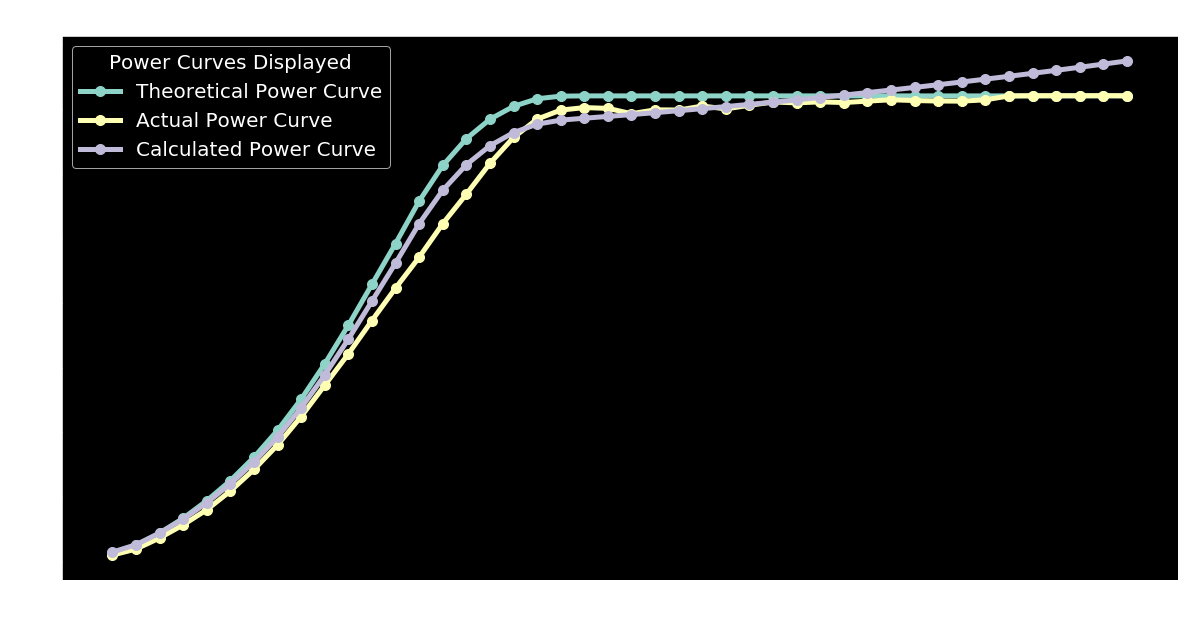

In [76]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(dtf["v"],dtf["P"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(dtf["v"],dtf["A"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(dtf["v"],dtf["Calc"],label="Calculated Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)",fontsize=18)
    plt.ylabel("Power (kW)",fontsize=18)
    #plt.title("Wind Farm {} Power Curve".format(turbine_no))
    #plt.title("Wind Farm Power Curve")
    plt.title('Wind Farm Power Curve', fontsize=30)
    #plt.legend()
    plt.rcParams['xtick.labelsize']=20
    plt.rcParams['ytick.labelsize']=20
    lg=plt.legend(title='Power Curves Displayed', prop={'size': 20})
    lg.get_title().set_fontsize(20)
    lg._legend_box.align = "center"
    plt.show()
    fig.savefig("Powercurve_Main.png",dpi=100)
    plt.close(fig)
        
graph_WT()

In [77]:
data_T_speed.shape

(44, 6)

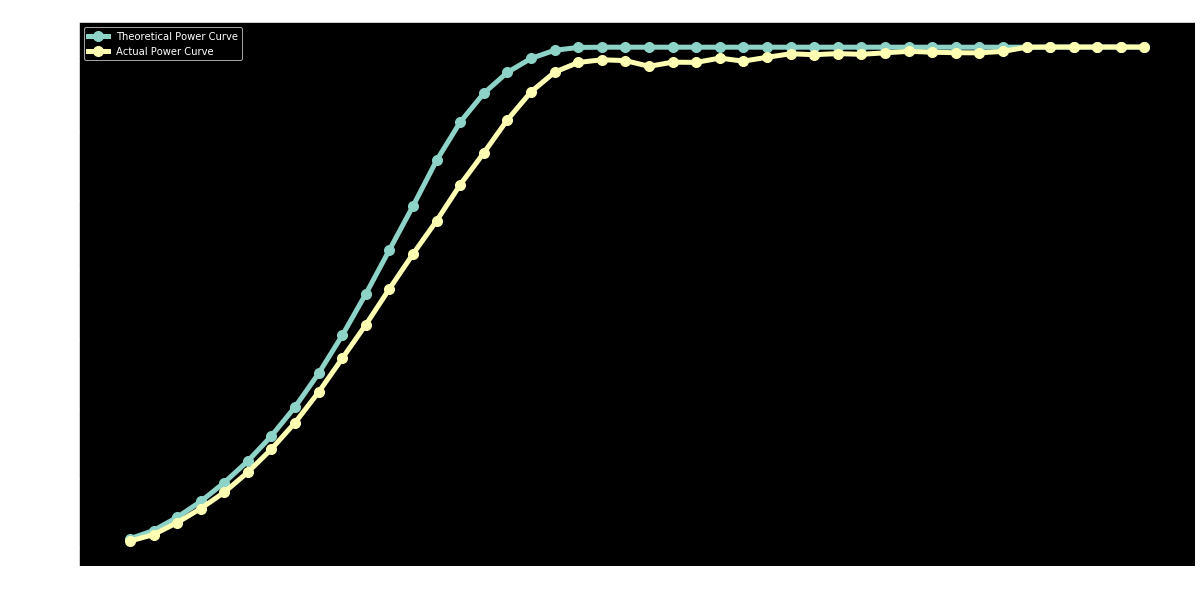

In [78]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve".format(turbine_no))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.png".format(turbine_no))
    plt.close(fig)
        
graph_WT()

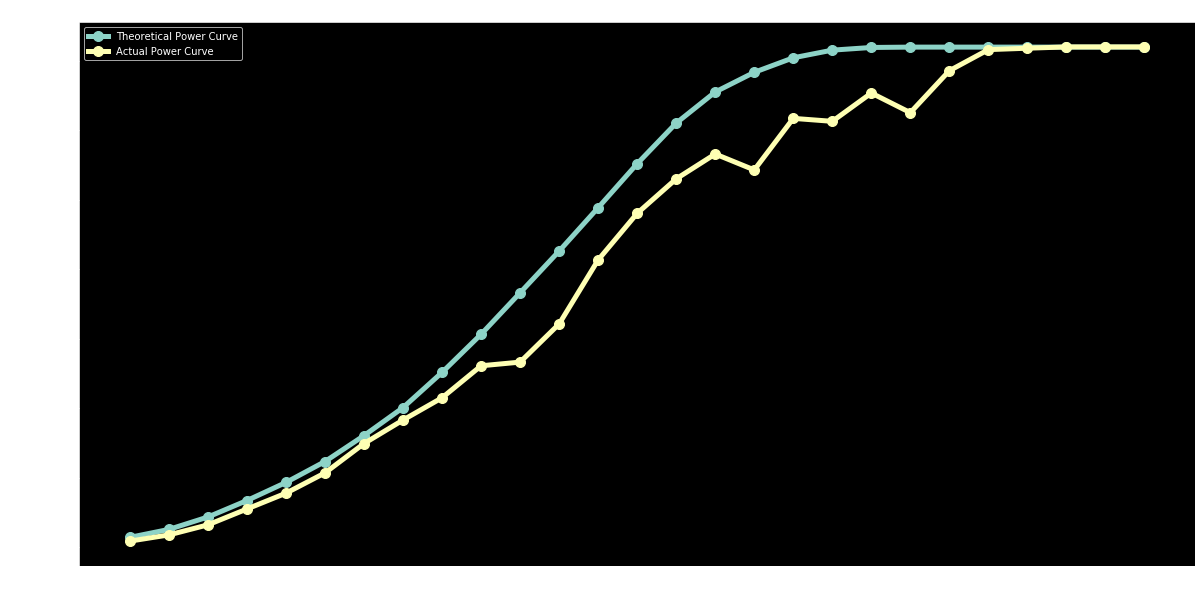

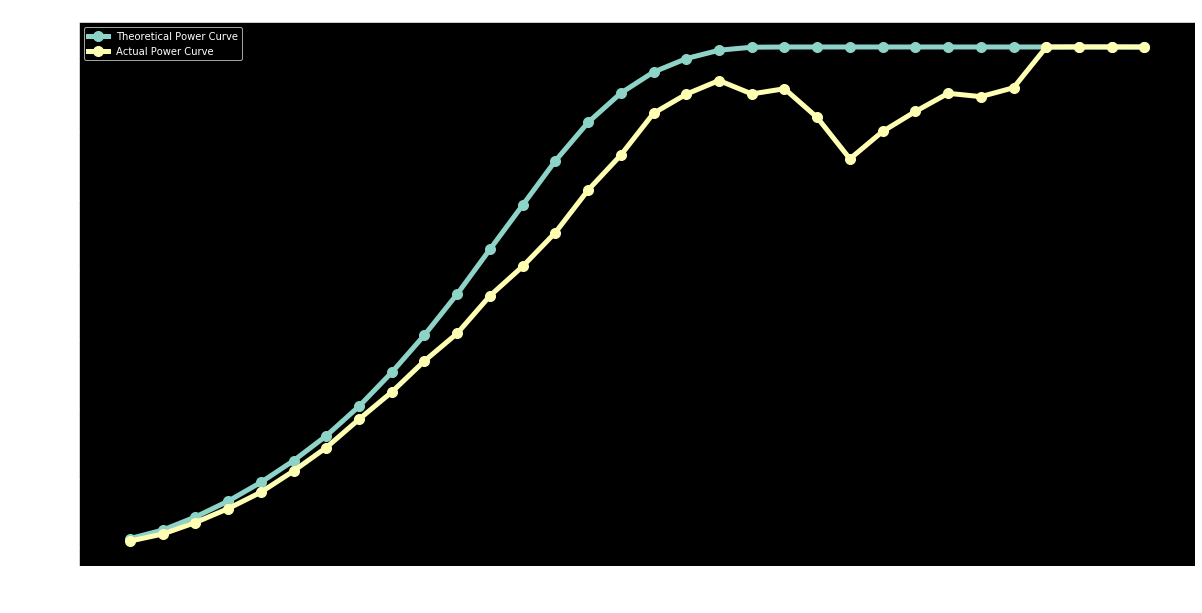

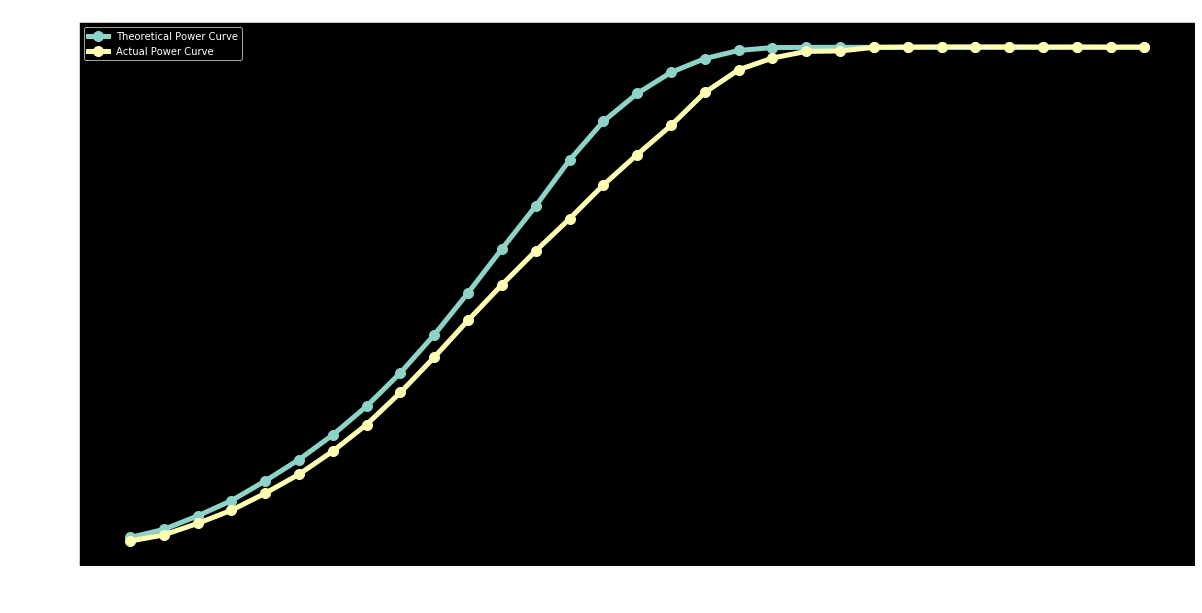

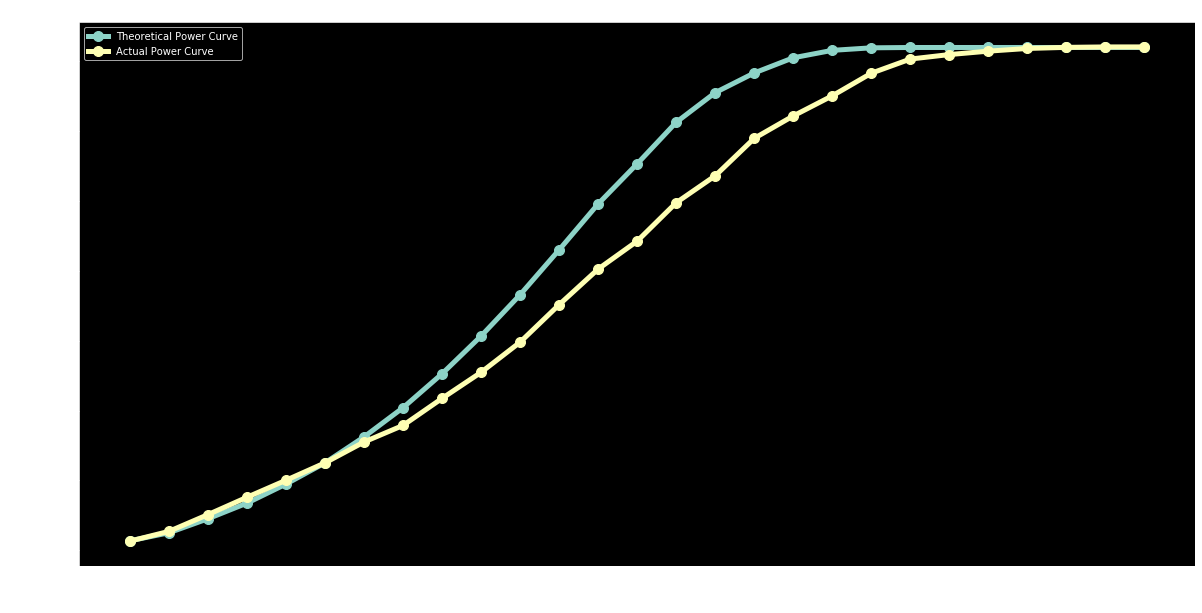

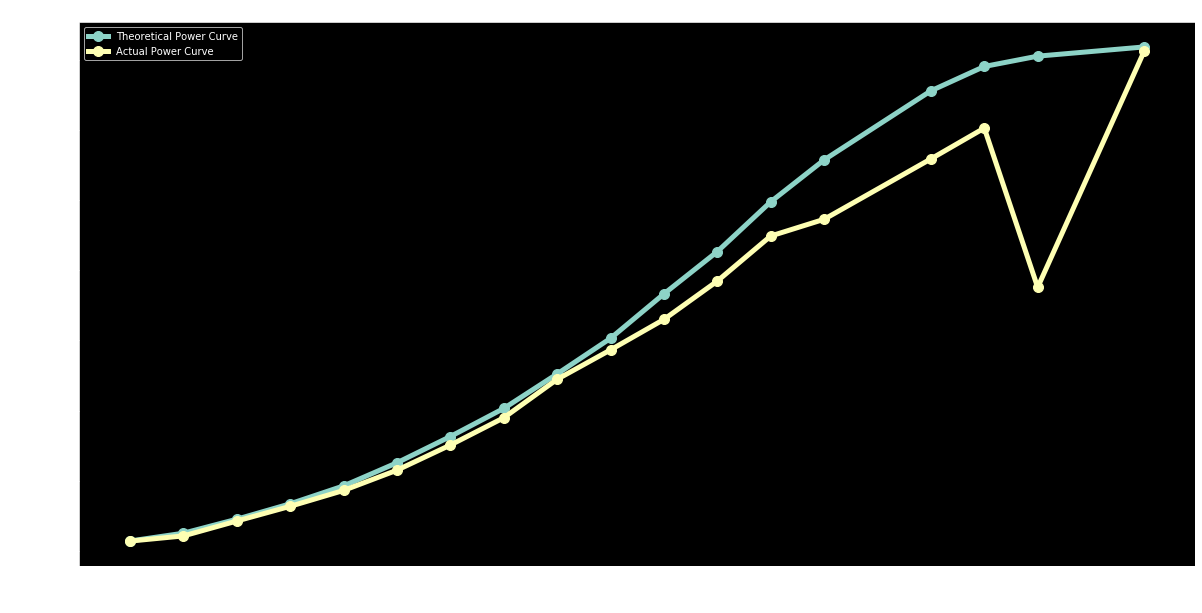

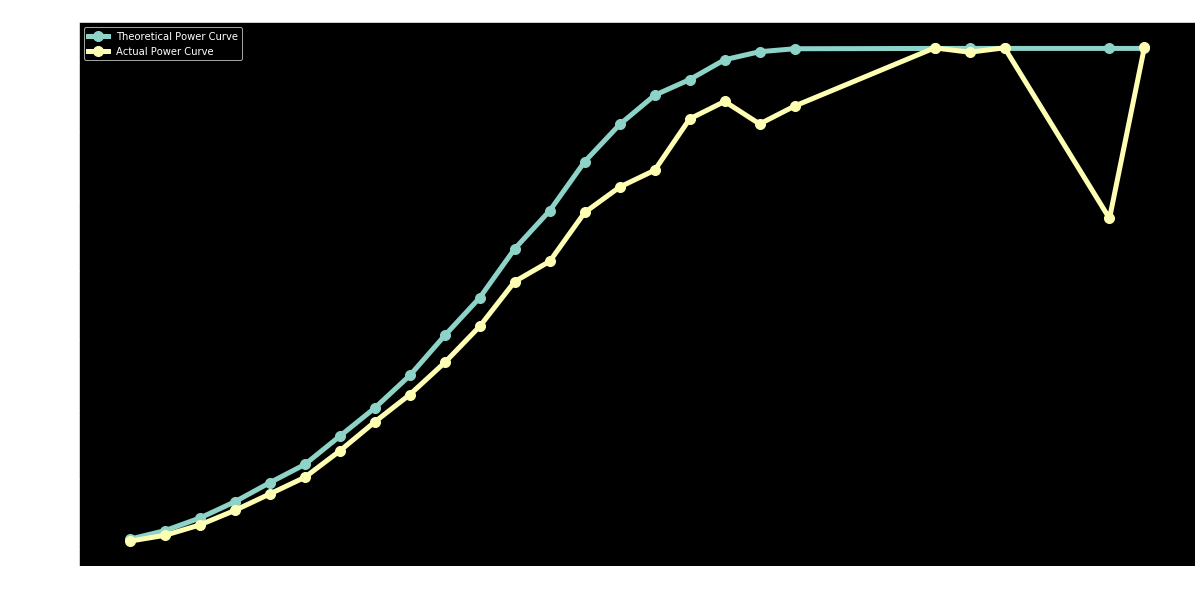

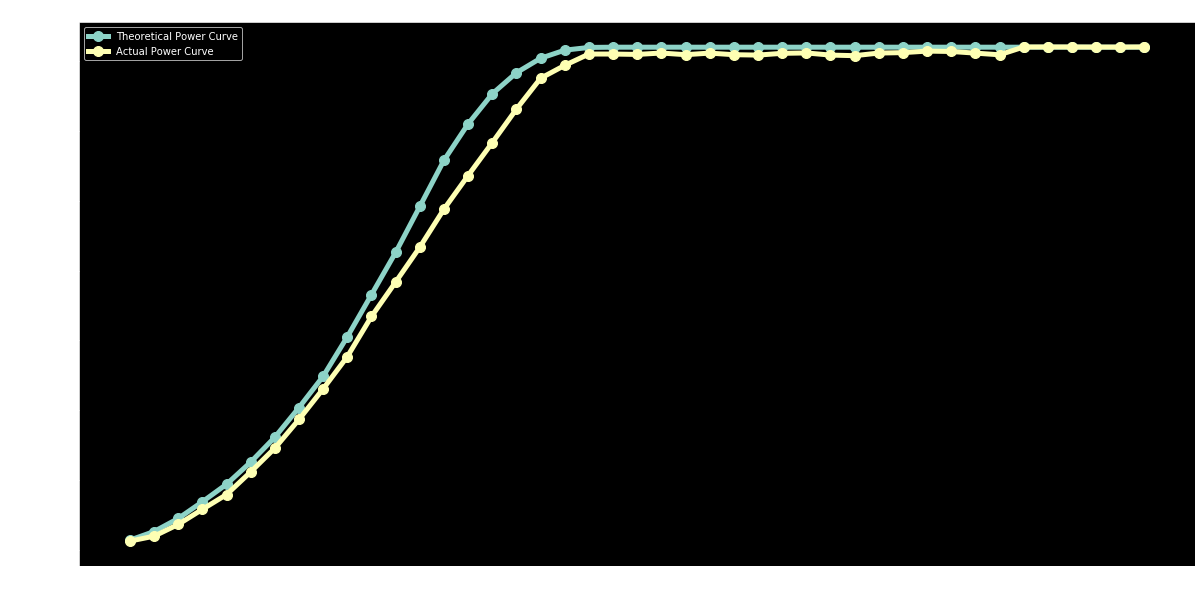

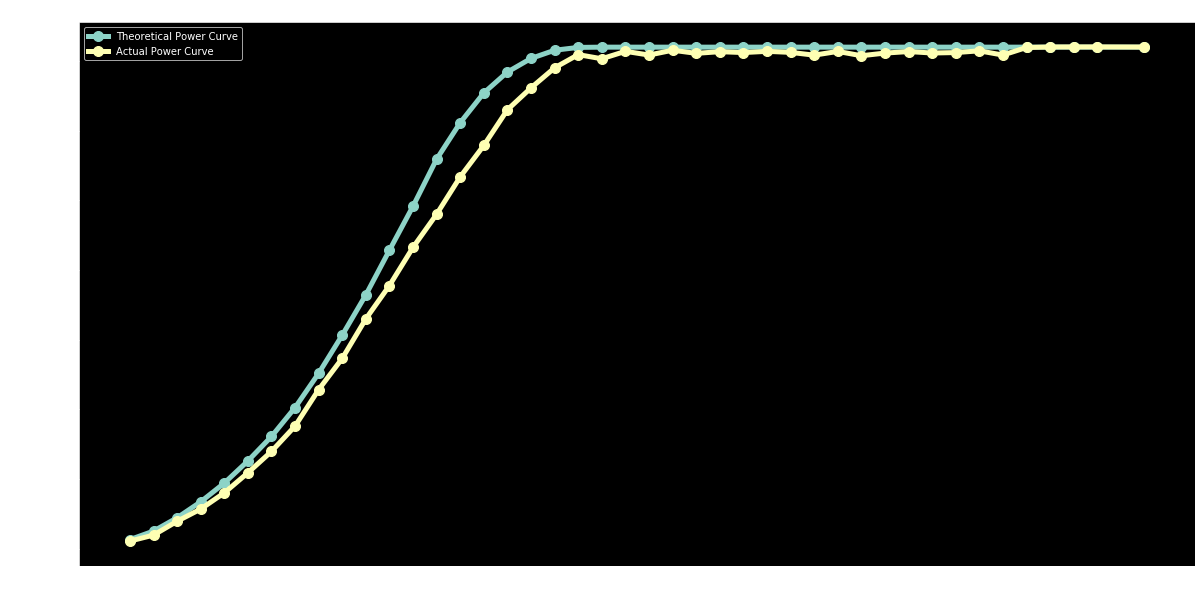

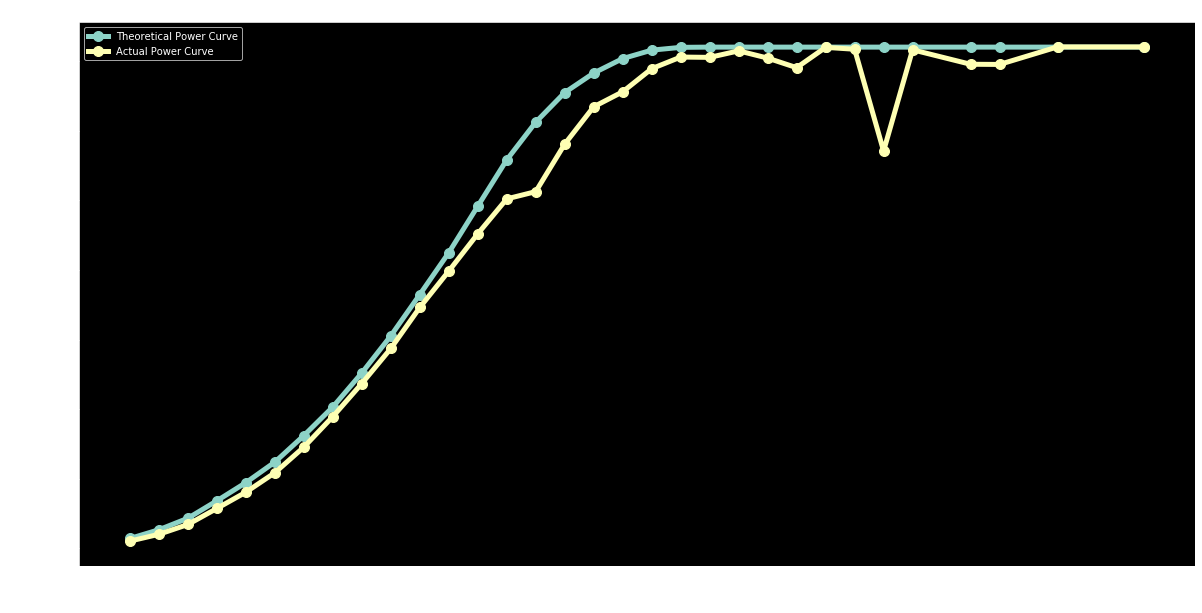

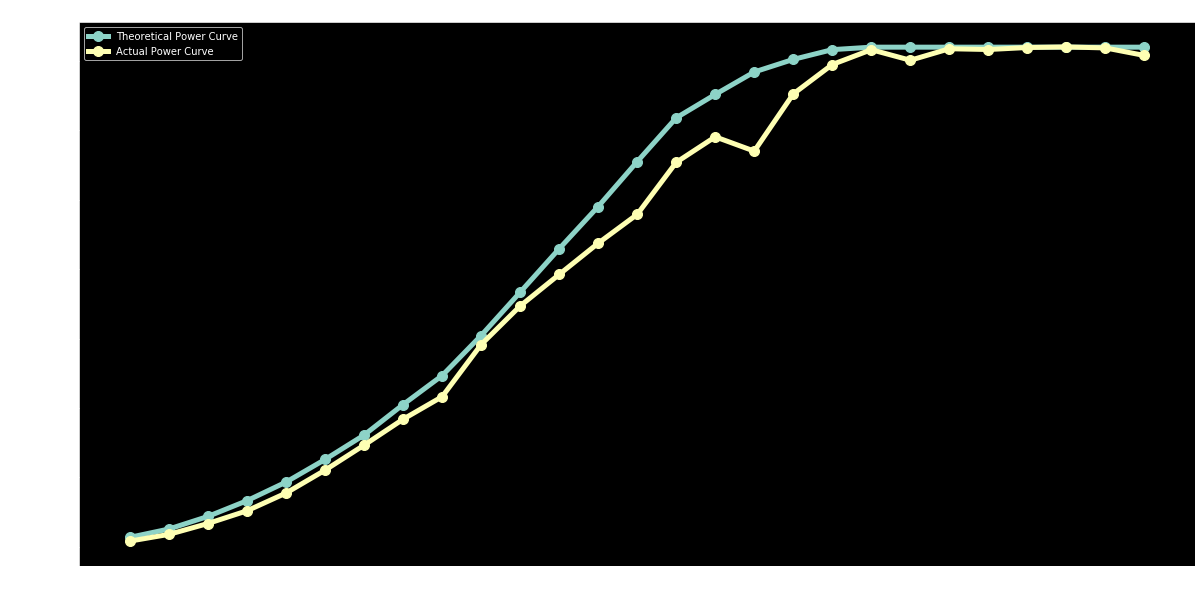

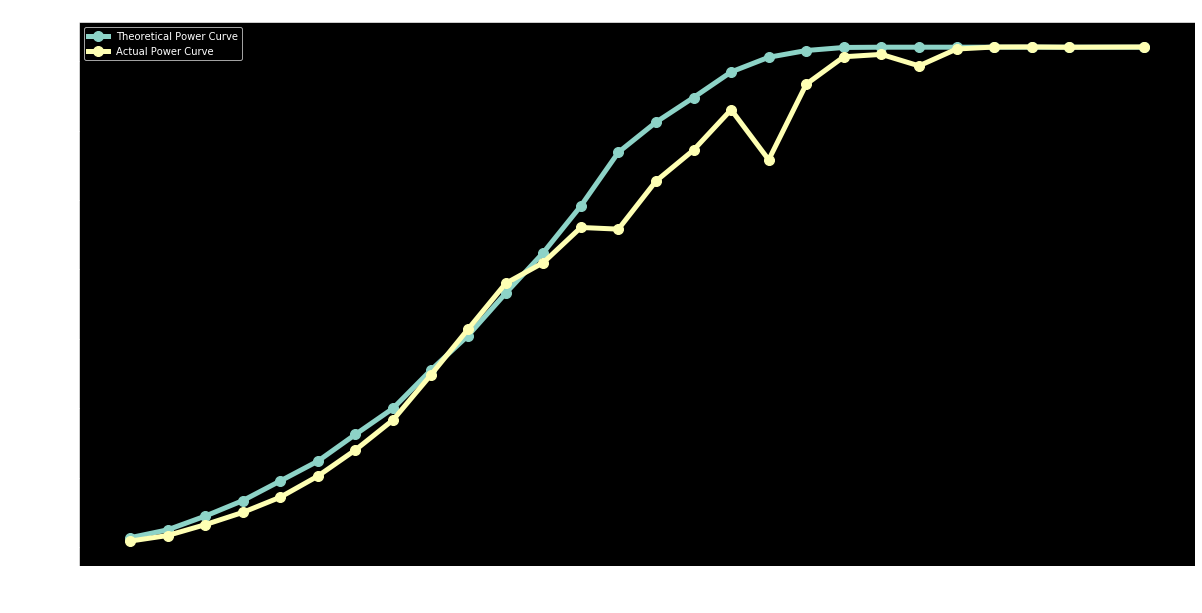

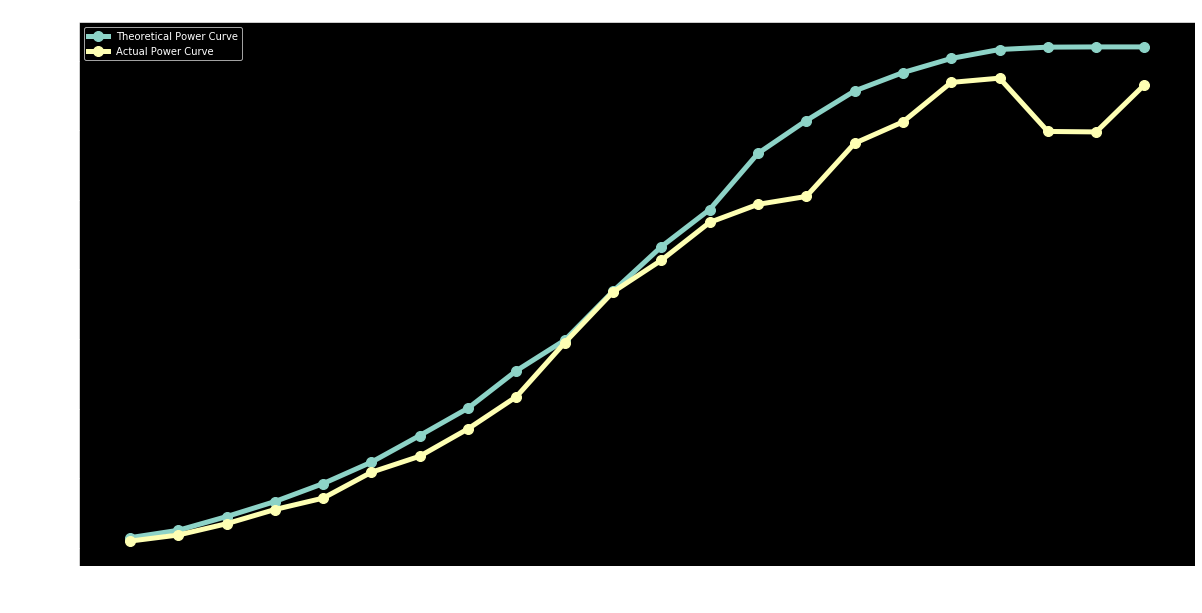

In [79]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve According to {} Wind".format(turbine_no,list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(turbine_no,list_tableName[i]))
    plt.close(fig)

# "N"=0, "NNE"=1,"NEE"=2,"E"=3,"SEE"=4,"SSE"=5,"S"=6,"SSW"=7,"SWW"=8,"W"=9,"NWW"=10,"NNW"=11

for i in range(0,12):
    graph_T(i)

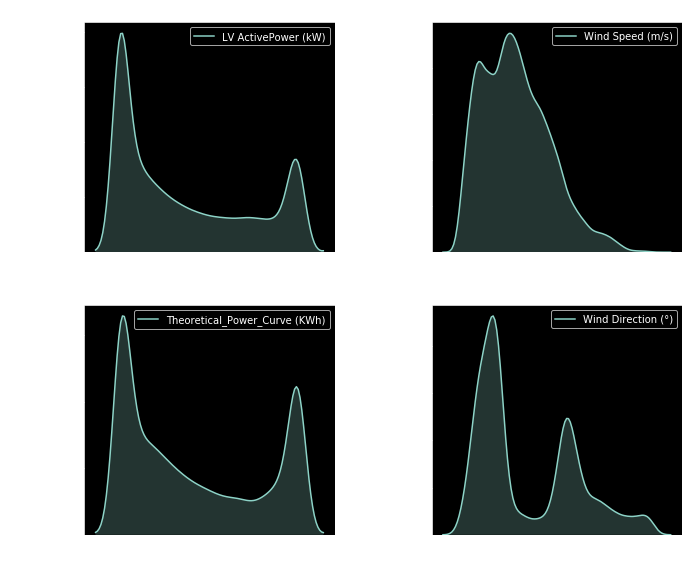

In [80]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_T_start.iloc[:,i+1], shade=True)
    plt.title(data_T_start.columns[i+1])
plt.tight_layout()
plt.show()

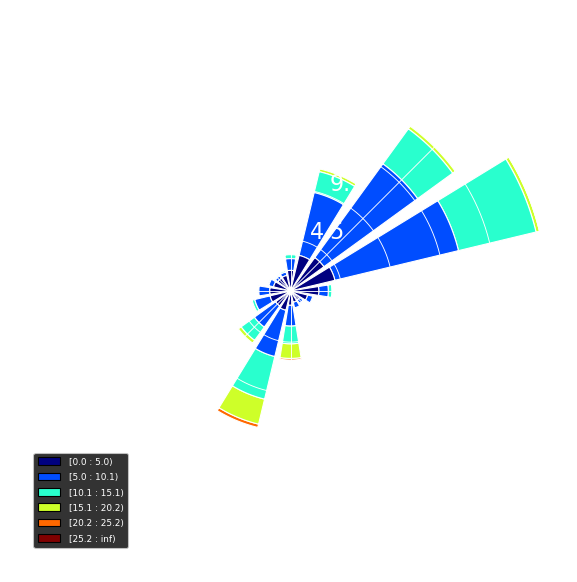

In [81]:
ax = WindroseAxes.from_ax()
ax.bar(data_T_start['Wind Direction (°)'], data_T_start['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

## Energy Prediction

In [82]:
import datetime
import time

In [83]:
data=pd.read_csv('../input/wind-turbine-scada-dataset/T1.csv')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [84]:
data.rename(columns={'Theoretical_Power_Curve (KWh)':'Power','LV ActivePower (kW)':'ActivePower',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [85]:
data['Time']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40


In [86]:
temp=data['Time'][1:].values - data['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [87]:
data['TimeDiff']=temp

In [88]:
data.tail()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,10,10
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,20,10
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,30,10
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,40,10
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,50,10


In [89]:
data['Gust']=np.array([0]+list(data['WindSpeed'][1:].values-data['WindSpeed'][:-1].values))
data.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,0,0,0.000000
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733


In [90]:
data.dtypes

Date/Time         object
ActivePower      float64
WindSpeed        float64
Power            float64
WindDirection    float64
Time               int64
TimeDiff           int64
Gust             float64
dtype: object

In [91]:
data_=data[data['TimeDiff'].isin([10,-50])]
data_.head()

,Date/Time,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,10,10,0.360831
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,20,10,-0.456130
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,30,10,0.443637
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,40,10,-0.081733
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,50,10,0.026111


In [92]:
len(data_)

50500

In [93]:
data_=data_[data_['ActivePower']>=0]
data_.describe()

,ActivePower,WindSpeed,Power,WindDirection,Time,TimeDiff,Gust
count,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000,50443.000000
mean,1309.932554,7.565593,1494.454238,123.716485,24.997125,-0.002181,0.001787
std,1312.471586,4.226063,1367.906548,93.425141,17.078962,22.362852,0.742791
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,-14.075440
25%,53.512621,4.212597,163.517562,49.344398,10.000000,10.000000,-0.380538
50%,828.896973,7.114135,1068.206544,73.689552,20.000000,10.000000,0.001451
75%,2485.947510,10.307985,2969.201056,201.697906,40.000000,10.000000,0.379923
max,3618.732910,25.206011,3600.000000,359.997589,50.000000,10.000000,17.411289


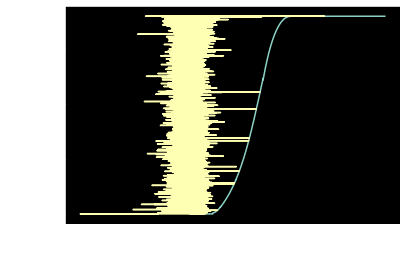

In [94]:
x=data_.sort_values(by='WindSpeed')['WindSpeed']
y=data_.sort_values(by='WindSpeed')['Power']
z=data_.sort_values(by='WindSpeed')['Gust']

plt.plot(x,y)
plt.plot(z,y)

In [95]:
x_train=data_[['WindSpeed','WindDirection','Gust']].values
y_train=data_['ActivePower'].values

## Training

In [96]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

In [97]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=15).get_n_splits(data_.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [98]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.5))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score


Lasso score: 532.5939 (166.2872)



array([838.45847838, 438.69383302, 350.88994159, 482.73217465,
       552.19514451])

In [99]:
HistGB=HistGradientBoostingRegressor(learning_rate=0.18,max_iter=100,max_leaf_nodes=4)

score = rmsle_cv(HistGB)
print("Hist Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

Hist Gradient Boosting score: 392.9342 (190.7309)



array([706.68074765, 267.68963625, 208.6759408 , 260.79656892,
       520.82826174])

In [100]:

KNR=KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', leaf_size=100, p=1, metric='minkowski')

score = rmsle_cv(KNR)
print("KNR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score

KNR score: 432.0385 (180.3508)



array([717.42917953, 294.25463431, 250.46500532, 329.32630819,
       568.71743596])

In [101]:
model_xgb1 = xgb.XGBRegressor(learning_rate=2e-2, max_depth=4, 
                             min_child_weight=1.1, n_estimators=100,
                             reg_alpha=0.3, reg_lambda=0.7,
                             #subsample=0.5213, silent=1,
                             nthread = -1)

In [102]:
model_xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=1.1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.3,
             reg_lambda=0.7, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [103]:
preds=model_xgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

450.24259360681566

In [104]:
r2_score(y_train,preds)

0.882314774332115

In [105]:
model_xgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([454.7521], dtype=float32)

In [106]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=2,
                              learning_rate=0.07, n_estimators=80,
                              #max_bin = 255, bagging_fraction = 0.8,
                              #bagging_freq = 5, feature_fraction = 0.8,
                              #feature_fraction_seed=9, bagging_seed=9,
                              reg_alpha=0.3,reg_lambda=0.7,
                              #min_data_in_leaf =3, min_sum_hessian_in_leaf = 2
                             )

In [107]:
model_lgb1.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.07, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=80, n_jobs=-1, num_leaves=2, objective='regression',
              random_state=None, reg_alpha=0.3, reg_lambda=0.7, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [108]:
preds=model_lgb1.predict(x_train)
score=mean_squared_error(y_train,preds)
score**0.5

391.9123625549006

In [109]:
r2_score(y_train,preds)

0.910832474267455

In [110]:
model_lgb1.predict(np.array([6.02,110.0,0.23]).reshape(1,-1))

array([542.52738079])

## Testing

In [111]:
test=[]
for i in range(1,6):
    test.append(pd.read_csv(f'../input/testwindpower/test{i}.csv'))


FileNotFoundError: [Errno 2] File ../input/testwindpower/test1.csv does not exist: '../input/testwindpower/test1.csv'

In [112]:
test=pd.concat(test,axis=0)
test.head()

ValueError: No objects to concatenate

In [113]:
test.sort_values(by='Date',inplace=True)
test.head()

AttributeError: 'list' object has no attribute 'sort_values'

In [114]:
test.columns=['Date','Speed','Direction','Energy']
test.head()

AttributeError: 'list' object has no attribute 'columns'

In [115]:
len(test)

0

In [116]:
for col in test.columns[1::2]:
    test[col]=test[col].apply(lambda x: float(x.replace(".","").replace(",",".")))

AttributeError: 'list' object has no attribute 'columns'

In [117]:
test.head()

AttributeError: 'list' object has no attribute 'head'

In [118]:
test['Gust']=np.array([0]+list(test['Speed'][1:].values-test['Speed'][:-1]))
test.head()

TypeError: list indices must be integers or slices, not str

In [119]:
x_val=test[['Speed','Direction','Gust']].values
y_val=test['Energy'].values
x_val.shape

TypeError: list indices must be integers or slices, not list

In [120]:
preds1=model_xgb1.predict(x_val)
preds1.shape

NameError: name 'x_val' is not defined

In [121]:
preds2=model_lgb1.predict(x_val)
preds2.shape

NameError: name 'x_val' is not defined

## XGBoost Score

In [122]:
score=mean_squared_error(y_val,preds1)
score**0.5

NameError: name 'y_val' is not defined

In [123]:
r2_score(y_val,preds1)

NameError: name 'y_val' is not defined

## LGBM Score

In [124]:
score=mean_squared_error(y_val,preds2)
score**0.5

NameError: name 'y_val' is not defined

In [125]:
r2_score(y_val,preds2)

NameError: name 'y_val' is not defined

## Let's See the Predictions

In [126]:
sam=1000
f=2
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds1[sam:f*sam])
plt.title('XGB')

NameError: name 'y_val' is not defined

In [127]:
sam=700
f=4
plt.plot(range(sam,f*sam),y_val[sam:f*sam])
plt.plot(range(sam,f*sam),preds2[sam:f*sam])
plt.title('LGB')

NameError: name 'y_val' is not defined

# Notes

This was just a baseline trial of predicting the power output given wind speed and direction.

More better fitting of model is very much possible with some hyperparameter tuning and ensemble methods.

Test data was scraped from some different conditions and location of wind turbine.

Great variance can be seen in testing data due to different conditions and location.